# Sujet 1 : Concentration de CO2 dans l'atmosphère depuis 1958

En 1958, Charles David Keeling  a initié une mesure de la concentration de CO2 dans l'atmosphère à l'observatoire de Mauna Loa, Hawaii, États-Unis qui continue jusqu'à aujourd'hui. L'objectif initial était d'étudier la variation saisonnière, mais l'intérêt s'est déplacé plus tard vers l'étude de la tendance croissante dans le contexte du changement climatique. En honneur à Keeling, ce jeu de données est souvent appelé "Keeling Curve" (voir [la source sur wikepedia](https://en.wikipedia.org/wiki/Keeling_Curve) pour l'histoire et l'importance de ces données).

In [1]:
# common imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os
import urllib.request
from datetime import date
import time
import numpy as np

today = date.today()

In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"

On récupère les données sur le [site de scrippsco2](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html)

In [3]:
data_file ="monthly_in_situ_co2_mlo.csv"

if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)
modtime=os.path.getmtime(data_file)
modtime=time.ctime(modtime)
print('file downloaded on',modtime)

file downloaded on Wed Apr  8 12:59:10 2020


In [4]:
raw_data = pd.read_csv(data_file, skiprows=54)
raw_data

Yr   Mn      Date        Date        CO2  seasonally          fit  \
0                                                  adjusted                
1                  Excel                  [ppm]      [ppm]         [ppm]   
2    1958   01     21200   1958.0411     -99.99      -99.99       -99.99   
3    1958   02     21231   1958.1260     -99.99      -99.99       -99.99   
4    1958   03     21259   1958.2027     315.70      314.44       316.19   
5    1958   04     21290   1958.2877     317.45      315.16       317.30   
6    1958   05     21320   1958.3699     317.51      314.71       317.86   
7    1958   06     21351   1958.4548     -99.99      -99.99       317.24   
8    1958   07     21381   1958.5370     315.86      315.19       315.86   
9    1958   08     21412   1958.6219     314.93      316.19       314.00   
10   1958   09     21443   1958.7068     313.21      316.08       312.46   
11   1958   10     21473   1958.7890     -99.99      -99.99       312.44   
12   1958   11     21504   1958.8740     313.33      315.20       313.62   
13   1958   12     21534   1958.9562     314.67      315.43       314.77   
14   1959   01     21565   1959.0411     315.58      315.54       315.62   
15   1959   02     21596   1959.1260     316.49      315.86       316.27   
16   1959   03     21624   1959.2027     316.65      315.38       316.98   
17   1959   04     21655   1959.2877     317.72      315.42       318.09   
18   1959   05     21685   1959.3699     318.29      315.49       318.65   
19   1959   06     21716   1959.4548     318.15      316.03       318.04   
20   1959   07     21746   1959.5370     316.54      315.86       316.67   
21   1959   08     21777   1959.6219     314.80      316.06       314.83   
22   1959   09     21808   1959.7068     313.84      316.72       313.32   
23   1959   10     21838   1959.7890     313.33      316.32       313.33   
24   1959   11     21869   1959.8740     314.81      316.68       314.54   
25   1959   12     21899   1959.9562     315.58      316.35       315.72   
26   1960   01     21930   1960.0410     316.43      316.39       316.61   
27   1960   02     21961   1960.1257     316.98      316.35       317.27   
28   1960   03     21990   1960.2049     317.58      316.28       318.03   
29   1960   04     22021   1960.2896     319.03      316.70       319.14   
..    ...  ...       ...         ...        ...         ...          ...   
728  2018   07     43296   2018.5370     408.90      408.08       409.43   
729  2018   08     43327   2018.6219     407.10      408.63       407.33   
730  2018   09     43358   2018.7068     405.59      409.09       405.66   
731  2018   10     43388   2018.7890     405.99      409.62       405.83   
732  2018   11     43419   2018.8740     408.12      410.39       407.47   
733  2018   12     43449   2018.9562     409.23      410.16       409.07   
734  2019   01     43480   2019.0411     410.92      410.87       410.29   
735  2019   02     43511   2019.1260     411.66      410.90       411.24   
736  2019   03     43539   2019.2027     412.00      410.45       412.25   
737  2019   04     43570   2019.2877     413.52      410.72       413.73   
738  2019   05     43600   2019.3699     414.83      411.42       414.54   
739  2019   06     43631   2019.4548     413.96      411.38       413.91   
740  2019   07     43661   2019.5370     411.85      411.03       412.36   
741  2019   08     43692   2019.6219     410.08      411.62       410.23   
742  2019   09     43723   2019.7068     408.55      412.06       408.52   
743  2019   10     43753   2019.7890     408.43      412.07       408.67   
744  2019   11     43784   2019.8740     410.28      412.56       410.29   
745  2019   12     43814   2019.9562     411.85      412.78       411.88   
746  2020   01     43845   2020.0410     413.37      413.33       413.11   
747  2020   02     43876   2020.1257     -99.99      -99.99       -99.99   
748  2020   03     43905   2020.2049     -99.99      -9

On a plusieurs petits problème avec la lecture de ces donnees brutes : les lignes 0 et 1 sont en fait des compléments des titres des colonnes. 

In [5]:
raw_data=pd.read_csv(data_file,skiprows=54,header=[0,1,2])
raw_data

Yr  Mn     Date       Date      CO2 seasonally         fit  \
                                             adjusted               
                 Excel               [ppm]     [ppm]        [ppm]   
0    1958   1    21200  1958.0411   -99.99     -99.99      -99.99   
1    1958   2    21231  1958.1260   -99.99     -99.99      -99.99   
2    1958   3    21259  1958.2027   315.70     314.44      316.19   
3    1958   4    21290  1958.2877   317.45     315.16      317.30   
4    1958   5    21320  1958.3699   317.51     314.71      317.86   
5    1958   6    21351  1958.4548   -99.99     -99.99      317.24   
6    1958   7    21381  1958.5370   315.86     315.19      315.86   
7    1958   8    21412  1958.6219   314.93     316.19      314.00   
8    1958   9    21443  1958.7068   313.21     316.08      312.46   
9    1958  10    21473  1958.7890   -99.99     -99.99      312.44   
10   1958  11    21504  1958.8740   313.33     315.20      313.62   
11   1958  12    21534  1958.9562   314.67     315.43      314.77   
12   1959   1    21565  1959.0411   315.58     315.54      315.62   
13   1959   2    21596  1959.1260   316.49     315.86      316.27   
14   1959   3    21624  1959.2027   316.65     315.38      316.98   
15   1959   4    21655  1959.2877   317.72     315.42      318.09   
16   1959   5    21685  1959.3699   318.29     315.49      318.65   
17   1959   6    21716  1959.4548   318.15     316.03      318.04   
18   1959   7    21746  1959.5370   316.54     315.86      316.67   
19   1959   8    21777  1959.6219   314.80     316.06      314.83   
20   1959   9    21808  1959.7068   313.84     316.72      313.32   
21   1959  10    21838  1959.7890   313.33     316.32      313.33   
22   1959  11    21869  1959.8740   314.81     316.68      314.54   
23   1959  12    21899  1959.9562   315.58     316.35      315.72   
24   1960   1    21930  1960.0410   316.43     316.39      316.61   
25   1960   2    21961  1960.1257   316.98     316.35      317.27   
26   1960   3    21990  1960.2049   317.58     316.28      318.03   
27   1960   4    22021  1960.2896   319.03     316.70      319.14   
28   1960   5    22051  1960.3716   320.04     317.22      319.67   
29   1960   6    22082  1960.4563   319.59     317.48      319.01   
..    ...  ..      ...        ...      ...        ...         ...   
726  2018   7    43296  2018.5370   408.90     408.08      409.43   
727  2018   8    43327  2018.6219   407.10     408.63      407.33   
728  2018   9    43358  2018.7068   405.59     409.09      405.66   
729  2018  10    43388  2018.7890   405.99     409.62      405.83   
730  2018  11    43419  2018.8740   408.12     410.39      407.47   
731  2018  12    43449  2018.9562   409.23     410.16      409.07   
732  2019   1    43480  2019.0411   410.92     410.87      410.29   
733  2019   2    43511  2019.1260   411.66     410.90      411.24   
734  2019   3    43539  2019.2027   412.00     410.45      412.25   
735  2019   4    43570  2019.2877   413.52     410.72      413.73   
736  2019   5    43600  2019.3699   414.83     411.42      414.54   
737  2019   6    43631  2019.4548   413.96     411.38      413.91   
738  2019   7    43661  2019.5370   411.85     411.03      412.36   
739  2019   8    43692  2019.6219   410.08     411.62      410.23   
740  2019   9    43723  2019.7068   408.55     412.06      408.52   
741  2019  10    43753  2019.7890   408.43     412.07      408.67   
742  2019  11    43784  2019.8740   410.28     412.56      410.29   
743  2019  12    43814  2019.9562   411.85     412.78      411.88   
744  2020   1    43845  2020.0410   413.37     413.33      413.11   
745  2020   2    43876  2020.1257   -99.99     -99.99      -99.99   
746  2020   3    43905  2020.2049   -99.99     -99.99      -99.99   
747  2020   4    43936  2020.2896   -99.99     -99.99      -99.99   
748  2020   5    43966  2020.3716   -99.99     -99.99      -99.99   
749  2020   6    43997  2020.4563   -99.99     -99.99      -99.99   
750  

On rassemble les 3 premières lignes pour changer les noms des colonnes

In [6]:
l_cols=list(raw_data.columns)
new_names_cols=[]
type(l_cols[0])
for item in l_cols: 
    new_string=''
    for string in item:
        new_string=new_string+' '+string
    item=" ".join(new_string.split())
    new_names_cols.append(item)

newh_data=raw_data
newh_data.columns=new_names_cols
newh_data

Yr  Mn  Date Excel       Date  CO2 [ppm]  seasonally adjusted [ppm]  \
0    1958   1       21200  1958.0411     -99.99                     -99.99   
1    1958   2       21231  1958.1260     -99.99                     -99.99   
2    1958   3       21259  1958.2027     315.70                     314.44   
3    1958   4       21290  1958.2877     317.45                     315.16   
4    1958   5       21320  1958.3699     317.51                     314.71   
5    1958   6       21351  1958.4548     -99.99                     -99.99   
6    1958   7       21381  1958.5370     315.86                     315.19   
7    1958   8       21412  1958.6219     314.93                     316.19   
8    1958   9       21443  1958.7068     313.21                     316.08   
9    1958  10       21473  1958.7890     -99.99                     -99.99   
10   1958  11       21504  1958.8740     313.33                     315.20   
11   1958  12       21534  1958.9562     314.67                     315.43   
12   1959   1       21565  1959.0411     315.58                     315.54   
13   1959   2       21596  1959.1260     316.49                     315.86   
14   1959   3       21624  1959.2027     316.65                     315.38   
15   1959   4       21655  1959.2877     317.72                     315.42   
16   1959   5       21685  1959.3699     318.29                     315.49   
17   1959   6       21716  1959.4548     318.15                     316.03   
18   1959   7       21746  1959.5370     316.54                     315.86   
19   1959   8       21777  1959.6219     314.80                     316.06   
20   1959   9       21808  1959.7068     313.84                     316.72   
21   1959  10       21838  1959.7890     313.33                     316.32   
22   1959  11       21869  1959.8740     314.81                     316.68   
23   1959  12       21899  1959.9562     315.58                     316.35   
24   1960   1       21930  1960.0410     316.43                     316.39   
25   1960   2       21961  1960.1257     316.98                     316.35   
26   1960   3       21990  1960.2049     317.58                     316.28   
27   1960   4       22021  1960.2896     319.03                     316.70   
28   1960   5       22051  1960.3716     320.04                     317.22   
29   1960   6       22082  1960.4563     319.59                     317.48   
..    ...  ..         ...        ...        ...                        ...   
726  2018   7       43296  2018.5370     408.90                     408.08   
727  2018   8       43327  2018.6219     407.10                     408.63   
728  2018   9       43358  2018.7068     405.59                     409.09   
729  2018  10       43388  2018.7890     405.99                     409.62   
730  2018  11       43419  2018.8740     408.12                     410.39   
731  2018  12       43449  2018.9562     409.23                     410.16   
732  2019   1       43480  2019.0411     410.92                     410.87   
733  2019   2       43511  2019.1260     411.66                     410.90   
734  2019   3       43539  2019.2027     412.00                     410.45   
735  2019   4       43570  2019.2877     413.52                     410.72   
736  2019   5       43600  2019.3699     414.83                     411.42   
737  2019   6       43631  2019.4548     413.96                     411.38   
738  2019   7       43661  2019.5370     411.85                     411.03   
739  2019   8       43692  2019.6219     410.08                     411.62   
740  2019   9       43723  2019.7068     408.55                     412.06   
741  2019  10       43753  2019.7890     408.43                     412.07   
742  2019  11       43784  2019.8740     410.28                     412.56   
743  2019  12       43814  2019.9562     411.85                     412.78   
744  2020   1       43845  2020.0410     413.37                     413.33   
745  2020   2       43876  20

Il y a également des données manquantes dont la valeur est mise à -99.99. On regarde ces lignes. On remarque que certaines lignes on également la dernière colonne sans valeurs. On va commencer par éliminer celles-ci

In [7]:
newh_data[newh_data['CO2 [ppm]']<0]

Yr  Mn  Date Excel       Date  CO2 [ppm]  seasonally adjusted [ppm]  \
0    1958   1       21200  1958.0411     -99.99                     -99.99   
1    1958   2       21231  1958.1260     -99.99                     -99.99   
5    1958   6       21351  1958.4548     -99.99                     -99.99   
9    1958  10       21473  1958.7890     -99.99                     -99.99   
73   1964   2       23422  1964.1257     -99.99                     -99.99   
74   1964   3       23451  1964.2049     -99.99                     -99.99   
75   1964   4       23482  1964.2896     -99.99                     -99.99   
745  2020   2       43876  2020.1257     -99.99                     -99.99   
746  2020   3       43905  2020.2049     -99.99                     -99.99   
747  2020   4       43936  2020.2896     -99.99                     -99.99   
748  2020   5       43966  2020.3716     -99.99                     -99.99   
749  2020   6       43997  2020.4563     -99.99                     -99.99   
750  2020   7       44027  2020.5383     -99.99                     -99.99   
751  2020   8       44058  2020.6230     -99.99                     -99.99   
752  2020   9       44089  2020.7077     -99.99                     -99.99   
753  2020  10       44119  2020.7896     -99.99                     -99.99   
754  2020  11       44150  2020.8743     -99.99                     -99.99   
755  2020  12       44180  2020.9563     -99.99                     -99.99   

     fit [ppm]  seasonally adjusted fit [ppm]  CO2 filled [ppm]  \
0       -99.99                         -99.99            -99.99   
1       -99.99                         -99.99            -99.99   
5       317.24                         315.14            317.24   
9       312.44                         315.40            312.44   
73      320.01                         319.36            320.01   
74      320.74                         319.41            320.74   
75      321.83                         319.45            321.83   
745     -99.99                         -99.99            -99.99   
746     -99.99                         -99.99            -99.99   
747     -99.99                         -99.99            -99.99   
748     -99.99                         -99.99            -99.99   
749     -99.99                         -99.99            -99.99   
750     -99.99                         -99.99            -99.99   
751     -99.99                         -99.99            -99.99   
752     -99.99                         -99.99            -99.99   
753     -99.99                         -99.99            -99.99   
754     -99.99                         -99.99            -99.99   
755     -99.99                         -99.99            -99.99   

     seasonally adjusted filled [ppm]  
0                              -99.99  
1                              -99.99  
5                              315.14  
9                              315.40  
73                             319.36  
74                             319.41  
75                             319.45  
745                            -99.99  
746                            -99.99  
747                            -99.99  
748                            -99.99  
749                            -99.99  
750                            -99.99  
751                            -99.99  
752                            -99.99  
753                            -99.99  
754                            -99.99  
755                            -99.99

In [8]:
#data=newh_data[newh_data['seasonally adjusted filled [ppm]']>0]
data=newh_data.drop(newh_data[newh_data['seasonally adjusted filled [ppm]']<0].index)

In [9]:
data['period'] = [pd.Period(freq='M',year=year,month=month) for (year,month) in zip(data['Yr'], data['Mn'])]

In [10]:
data.set_index('period',inplace=True)
periods = data.index

for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Il n'y a aucune semaine manquante

Regardons les données :

## Données superposées

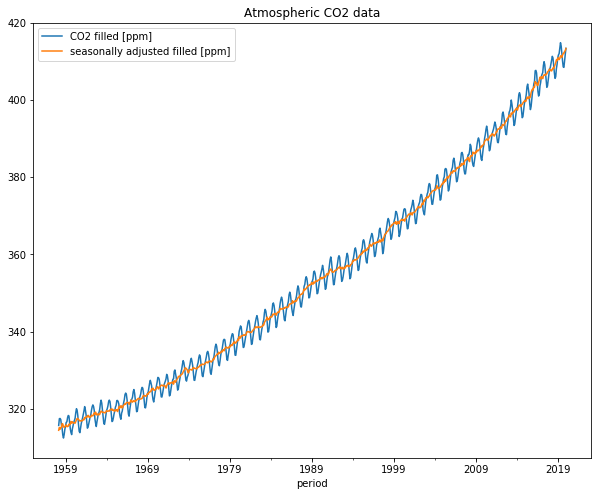

In [11]:
data['CO2 filled [ppm]'].plot(legend=True, title='Atmospheric CO2 data',figsize=(10,8))
data['seasonally adjusted filled [ppm]'].plot(legend=True)


L'évolution du CO2 dans l'atmosphère suit une oscillation périodique, qu'on supperpose avec une évolution systématique plus lente

## Séparation des deux phénomènes

### Evolution systématique

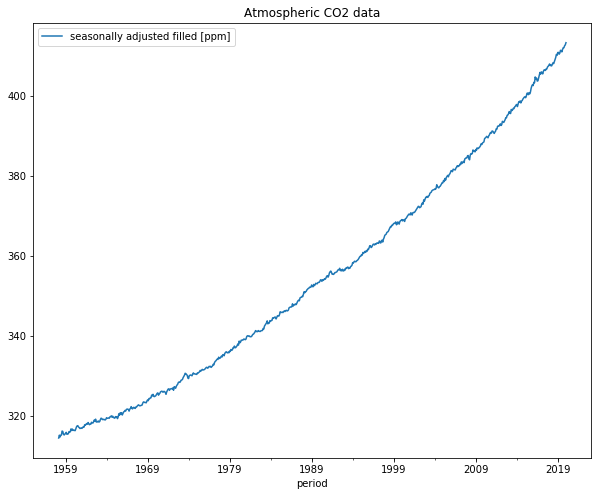

In [12]:
data['seasonally adjusted filled [ppm]'].plot(legend=True, title='Atmospheric CO2 data',figsize=(10,8))

On va essayer de faire une régression polynomiale sur ces données.

           3             2
6.472e-13 x + 3.441e-08 x - 4.969e-05 x + 293.5


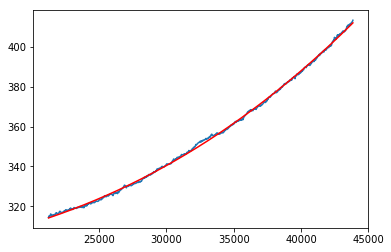

In [13]:
x=data['Date Excel'].values
y=data['seasonally adjusted filled [ppm]'].values
poly = np.poly1d(np.polyfit(x, y, 3))
print(poly)
#xp = np.linspace(0, 7, 100)
plt.plot(x,y)
plt.plot(x, poly(x), c='r')

On a commencé par utiliser le format excel de la date pour avoir des données de type float pour pouvoir travailler avec numpy. En effet : Excel stocke les dates sous la forme de numéros de série séquentiels afin qu’elles soient utilisables dans des calculs. Le 1er janvier 1900 porte le numéro de série 1, et le 1er janvier 2008 le numéro de série 39448 car il se situe 39 447 jours après le 1er janvier 1900. Pour pouvoir afficher une date correcte, vous devez modifier le format de nombre (Format de cellule).

The model gives 425.62 ppm of atmospheric CO2 in June 2025


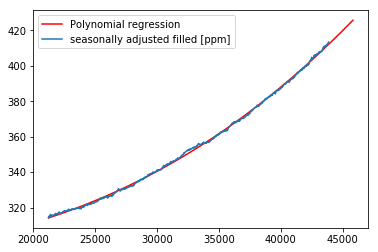

In [14]:
ref_excel=pd.Timestamp(year=1900,month=1,day=1)
end_pred=pd.Timestamp(year=2025,month=6,day=1)
end_pred_xl=(end_pred-ref_excel).days
xpred=np.linspace(data.iloc[0]['Date Excel'],end_pred_xl,900)
plt.plot(xpred, poly(xpred), c='r',label='Polynomial regression')
plt.plot(x,y,label='seasonally adjusted filled [ppm]')
plt.legend()
prd=poly(end_pred_xl)
print('The model gives %.2f ppm of atmospheric CO2 in June 2025' %prd)

### Oscillation saisonnière

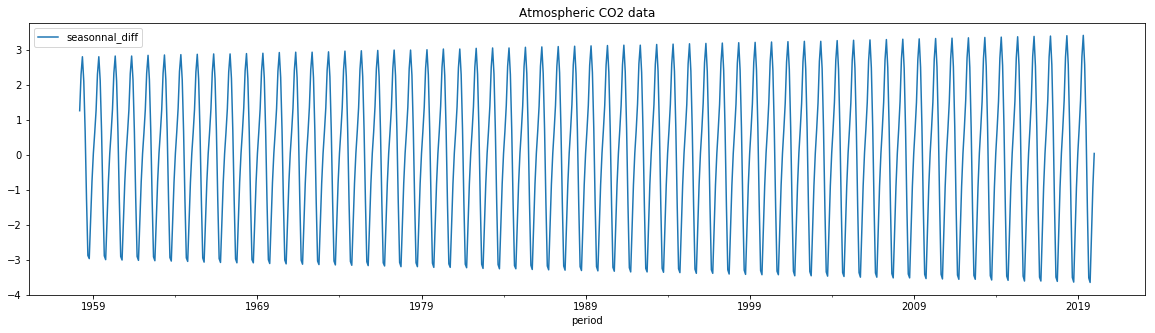

In [15]:
data['seasonnal_diff']=data['CO2 filled [ppm]']-data['seasonally adjusted filled [ppm]']
data['seasonnal_diff'].plot(legend=True, title='Atmospheric CO2 data',figsize=(20,5))

Un zoom sur les dernières années

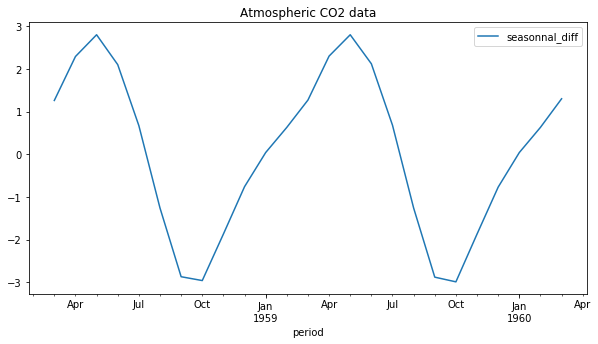

In [16]:
data['seasonnal_diff'][:25].plot(legend=True, title='Atmospheric CO2 data',figsize=(10,5))

On identifie une évolution sinusoïdale dont l'amplitude augmente légèrement.
la période de ces oscillations est d'environ 1 an.
l'amplidue des oscillations est de +/- 3 ppm.

In [42]:
x=data['Date Excel'].values
a=data['seasonnal_diff'].values
i_locmax=np.r_[True, a[1:] > a[:-1]] & np.r_[a[:-1] > a[1:], True]
a[i_locmax]

array([2.8 , 2.8 , 2.82, 2.82, 2.84, 2.85, 2.86, 2.87, 2.88, 2.88, 2.89,
       2.9 , 2.92, 2.93, 2.93, 2.94, 2.96, 2.97, 2.98, 2.99, 2.99, 3.  ,
       3.02, 3.02, 3.04, 3.05, 3.05, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12,
       3.13, 3.13, 3.15, 3.16, 3.17, 3.18, 3.19, 3.2 , 3.21, 3.22, 3.23,
       3.24, 3.24, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34,
       3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.41, 0.04])

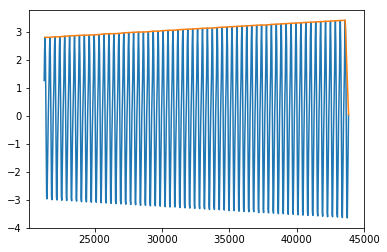

In [34]:
plt.plot(x,a)
plt.plot(x[i_locmax],a[i_locmax])

[ True  True False False False False False  True  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True False False False False False  True  T